# Emotion Detection
*Importing lib*

In [ ]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D
# from tensorflow.keras.layers import Dence
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.15.0


## Loading Dataset

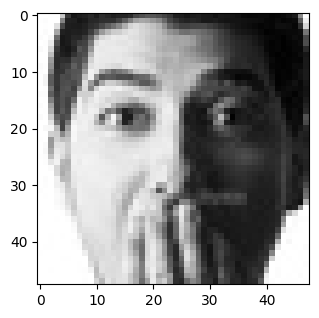

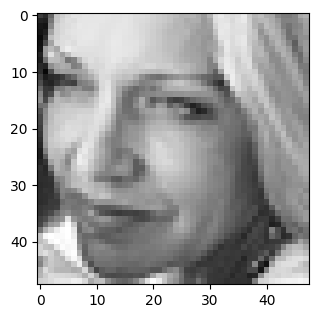

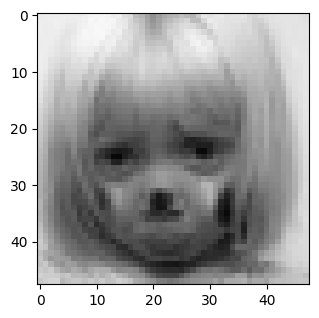

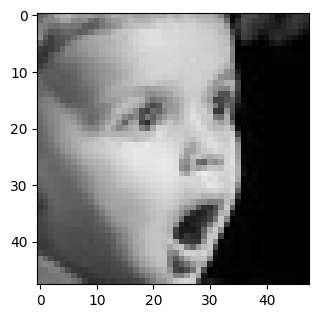

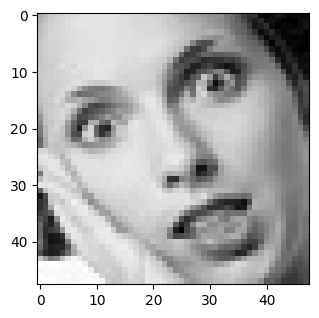

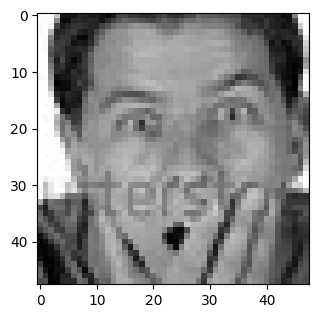

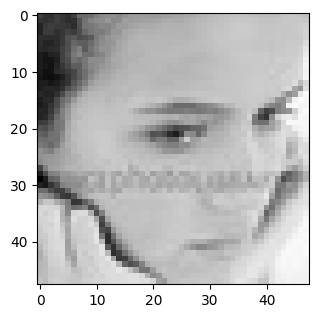

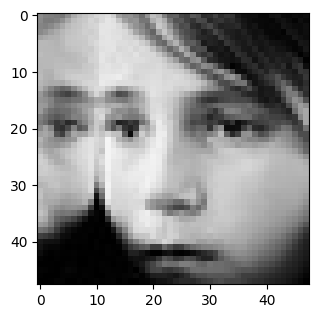

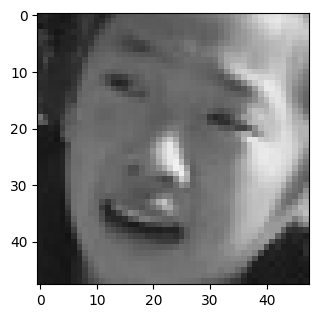

In [ ]:
images = glob ("/content/drive/MyDrive/Emotional_detector/train/**/**")
for i in range(9):
  image = random.choice(images)
  plt.figure(figsize=(12,12))
  plt.subplot(331+i)
  plt.imshow(cv2.imread(image))

# **Data Training**

In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/Emotional_detector/train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

datagen_test = ImageDataGenerator()
validation_generator = datagen_test.flow_from_directory("/content/drive/MyDrive/Emotional_detector/test",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 2286 images belonging to 7 classes.
Found 2568 images belonging to 7 classes.


In [ ]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [ ]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [ ]:
def model_fed(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])

    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [ ]:
model = model_fed((48, 48, 1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

In [ ]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

# Training the model

In [ ]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
)

Epoch 1/15
35/35 [==============================] - ETA: 0s - loss: 1.2643 - accuracy: 0.5630 
Epoch 1: saving model to model_weights.h5
35/35 [==============================] - 1801s 52s/step - loss: 1.2643 - accuracy: 0.5630 - val_loss: 18.1156 - val_accuracy: 0.2098
Epoch 2/15
35/35 [==============================] - ETA: 0s - loss: 0.8504 - accuracy: 0.6539
Epoch 2: saving model to model_weights.h5
35/35 [==============================] - 9s 250ms/step - loss: 0.8504 - accuracy: 0.6539 - val_loss: 11.2742 - val_accuracy: 0.2176
Epoch 3/15
35/35 [==============================] - ETA: 0s - loss: 0.7503 - accuracy: 0.6872
Epoch 3: saving model to model_weights.h5
35/35 [==============================] - 7s 202ms/step - loss: 0.7503 - accuracy: 0.6872 - val_loss: 6.0158 - val_accuracy: 0.2129
Epoch 4/15
35/35 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.7138
Epoch 4: saving model to model_weights.h5
35/35 [==============================] - 7s 206ms/step - lo

# Model Evaluate

In [ ]:
model.evaluate(validation_generator)

41/41 [==============================] - 4s 100ms/step - loss: 6.2809 - accuracy: 0.2963


[6.28087043762207, 0.29633957147598267]

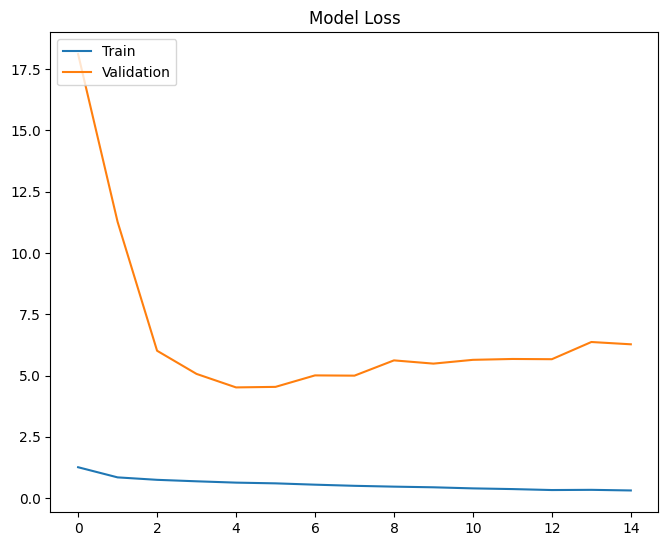

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

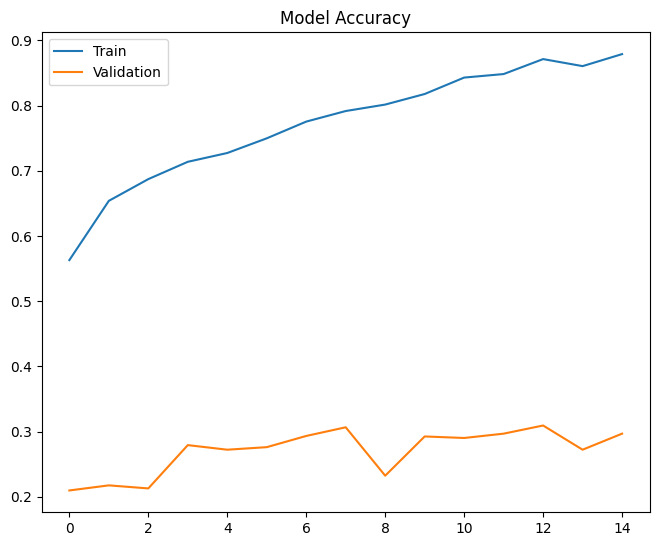

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

#Saving Model

In [ ]:
model_json = model.to_json()
with open("emotion_detect.json","w") as json_file:
  json_file.write(model_json)